In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

import sys
sys.path.append('../models')
import gaussian_2d as gp2d

In [18]:
mu_y = 0.5 # 平均値
sigma = 0.1  # ノイズの分散
kernel = gp2d.RBF(alpha=0.3, beta=0.1)  # カーネル関数
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

# 学習
x1 = np.array([[0.2, 0.2]])
model.append(x1, 1)
x2 = np.array([[0.8, 0.8]])
model.append(x2, 0)

# 予測
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

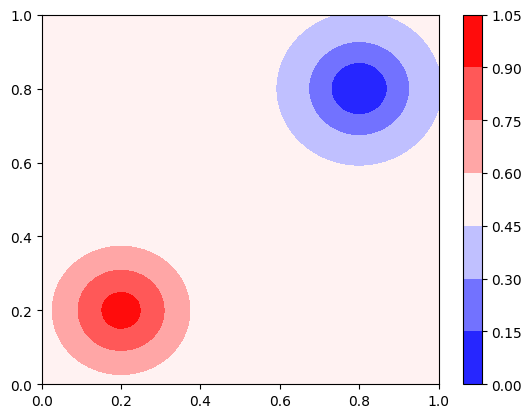

In [19]:
# plot
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z, cmap="bwr", vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [20]:
# 多変量正規分布の関数形から値を取得しベルヌーイ分布のパラメータとする
def sample_multivariate_normal(x):
  mu = np.array([0.5, 0.5])
  cov = np.array([[0.1, 0],
                [0, 0.1]])
  inv_cov = np.linalg.inv(cov)

  y = 0.8 * (np.exp(-(1/2) * (x - mu).T @ inv_cov @ (x - mu)))
  return y #st.bernoulli(y).rvs()

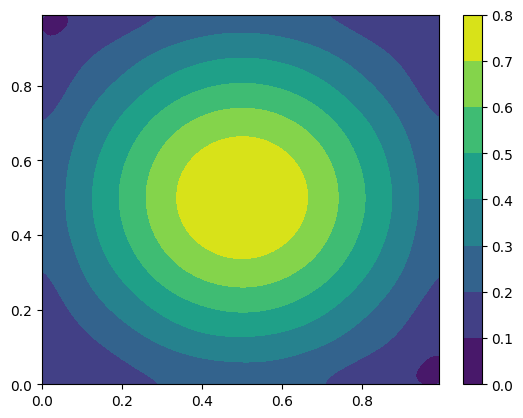

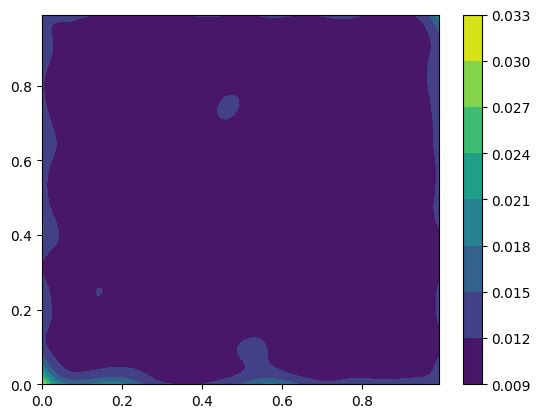

In [23]:
model = gp2d.GP2D(mu_y, sigma, kernel)  # GPモデルのインスタンスを生成

# 学習
import random
data_numbers = 1000
data_x = np.random.rand(data_numbers, 2)

# ランダムな箇所に確率的に値を与える
for d in data_x:
  y = sample_multivariate_normal(d)
  model.append(d[:,None].T, y)


# xy = st.uniform().rvs(100, 2)
# d = model.dist(xy)
# s = d.rvs()
# idx = np.argmax(s)
# xy[idx]


x = np.linspace(0, 1, 100, endpoint=False)
y = np.linspace(0, 1, 100, endpoint=False)
xx, yy = np.meshgrid(x, y)
xdist = np.c_[xx.reshape(-1), yy.reshape(-1)] 
d = model.dist(xdist)

# plot mean
# Z = d.rvs()
Z = d.mean().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()

# plot var
Z = d.var().reshape(100,100)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, Z)
plt.colorbar()
plt.show()